# Calibration of Open Street Map (Routino) travel time vs Google Maps travel time

Google maps times come from predicted travel time at Noon on Wednesday. Predictions are given by Google as a range. We have used the lower limit as indicative of emergency ambulance travel time.

Open Street Map (OSM) travel times are calibrated against Google Maps travel times. Times used are taken from inter-hospital travel times.

These calibrated OSM travel times are taken as *indicative* travel times for emergency ambulance travel times.

## Load packages and data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
data = pd.read_csv('calibration_minutes.csv')

## Fit a linear regression line to OSM vs Google Maps travel time

In [3]:
x = data['OSM']
y = data['Google Noon Wed']

# Fit a regression line
slope, intercept, r_value, p_value, std_err1 = \
    stats.linregress(x, y)
r_square = r_value ** 2
y_cal = intercept + (x * slope)

In [4]:
print (f'Intercept: {intercept:0.1f}')
print (f'Slope: {slope:0.4f}')
print (f'R-squared: {r_square:0.3f}')
print (f'P: {p_value:0.5f}')

Intercept: 6.3
Slope: 1.0752
R-squared: 0.978
P: 0.00000


Average ratio

In [5]:
average_ratio = np.mean(y / x)
print(f'Average Google / OSM = {average_ratio:0.2f}')

Average Google / OSM = 1.38


## Plot results

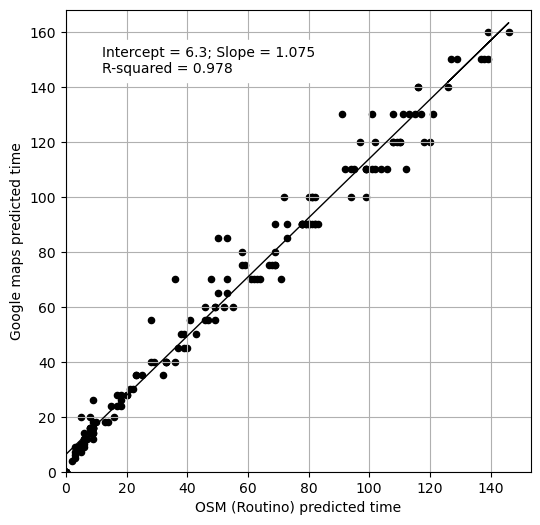

In [6]:
# Create scatter plot with regression line
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, color = "k", marker="o", s=20)
ax1.set_xlim(0)
ax1.set_ylim(0)
ax1.plot (x, y_cal, color = 'k', linestyle='-', linewidth=1)

text = (f'Intercept = {intercept:0.1f}; Slope = {slope:0.3f}' +
        f'\nR-squared = {r_square:0.3f}')

ax1.text(12, 145, text, 
         bbox=dict(facecolor='white', edgecolor='white'))

ax1.set_xlabel('OSM (Routino) predicted time')
ax1.set_ylabel('Google maps predicted time')
ax1.grid()

plt.savefig('osm_google_calibration.jpg', dpi=300)

plt.show()

## Check mean absolute difference between calibrated OSM time and Google Maps time

In [7]:
mean_abs_diff = np.mean(abs(y_cal - y))
print (f'Mean abolsute difference: {mean_abs_diff:0.1f}')

Mean abolsute difference: 4.7


Stats on differences.

In [8]:
diff = pd.Series(y_cal - y)
diff.describe()

count    1.610000e+02
mean    -1.721190e-15
std      6.720215e+00
min     -2.586295e+01
25%     -2.522532e+00
50%      1.235197e+00
75%      3.980560e+00
max      1.671530e+01
dtype: float64